<a href="https://colab.research.google.com/github/SsYuRb/Melanoma_detection/blob/main/notebooks/classification.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Download & unzip HAM10000

In [ ]:
!wget http://fmb.images.gan4x4.ru/msu/usufov/ham10000.zip
!unzip ham10000.zip

In [ ]:
IMGS_FOLDER = '"ham10000"'

In [ ]:
import os
from PIL import Image
import numpy as np
from tqdm.notebook import tqdm
#IMGS_FOLDER = '/content/drive/MyDrive/skin_data'
classes = os.listdir(IMGS_FOLDER)

imgs = []
targets = []
for lesion in tqdm(os.listdir(IMGS_FOLDER)):
    subfolder = os.path.join(IMGS_FOLDER, lesion)
    for img_name in tqdm(os.listdir(subfolder)):
        targets.append(lesion)
        with Image.open(os.path.join(subfolder, img_name)) as img:
            imgs.append(np.array(img))
imgs = np.array(imgs)
targets = np.array(targets)


  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/6734 [00:00<?, ?it/s]

  0%|          | 0/327 [00:00<?, ?it/s]

  0%|          | 0/1099 [00:00<?, ?it/s]

  0%|          | 0/1113 [00:00<?, ?it/s]

  0%|          | 0/524 [00:00<?, ?it/s]

  0%|          | 0/142 [00:00<?, ?it/s]

In [ ]:

import torch

In [ ]:
import warnings, random
warnings.simplefilter('ignore')
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(42)

In [ ]:
targets_bin = targets == 'MEL'

In [ ]:
imgs = torch.from_numpy(imgs).float()  # Convert the image array to float tensor
targets_bin = torch.from_numpy(targets_bin)  # Keep the target array as a tensor

In [ ]:
targets_bin

tensor([False, False, False,  ..., False, False, False])

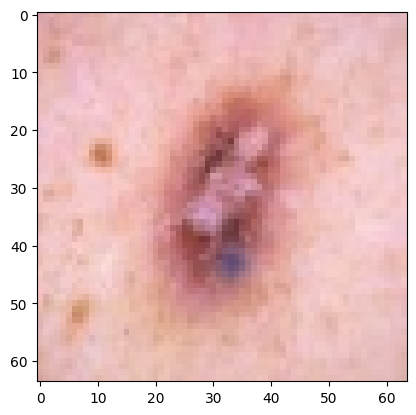

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(imgs[1]/ 255.0)

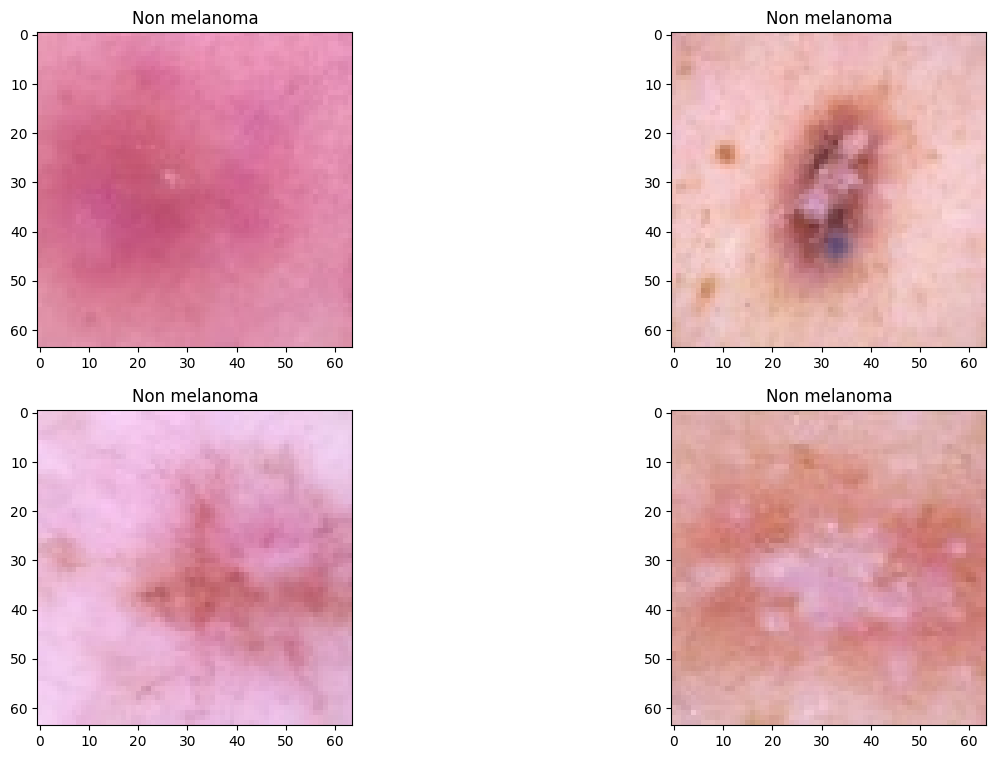

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 9))
# fig.subplots_adjust(hspace=0.5)

for i in range(4):
    ax = axes[i // 2, i % 2]

    # Инвертирование нормализации (если была применена)
    # img = inverse_transform(imgs[i])

    # Преобразование тензора в изображение

    # Отображение изображения
    ax.imshow(imgs[i]/255.0)
    ax.set_title(f'{"Melanoma" if targets_bin[i] else "Non melanoma"}')
    # ax.axis('off')

plt.show()


In [ ]:




imgs.shape

torch.Size([10054, 64, 64, 3])

In [ ]:
targets_bin

tensor([False, False, False,  ..., False, False, False])

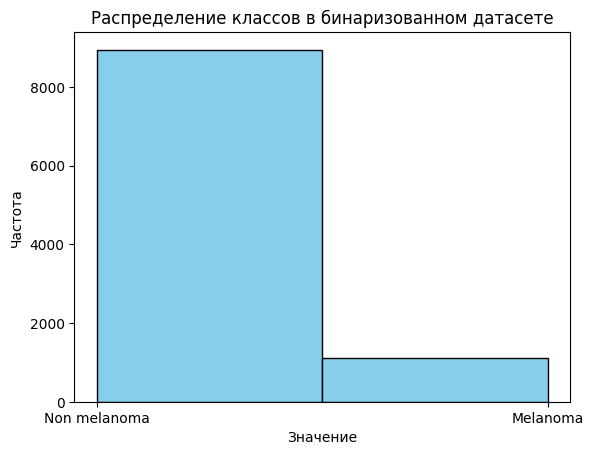

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Построение гистограммы
targets_bin_int = [int(val) for val in targets_bin]

plt.hist(targets_bin_int, bins=[0, 0.5, 1], align='mid', color='skyblue', edgecolor='black')
unique_values, counts = zip(*sorted(Counter(targets_bin_int).items()))
# Настройка графика
plt.title('Распределение классов в бинаризованном датасете')
plt.xticks(unique_values, ['Non melanoma', 'Melanoma'])
plt.xlabel('Значение')
plt.ylabel('Частота')

# Отображение графика
plt.show()


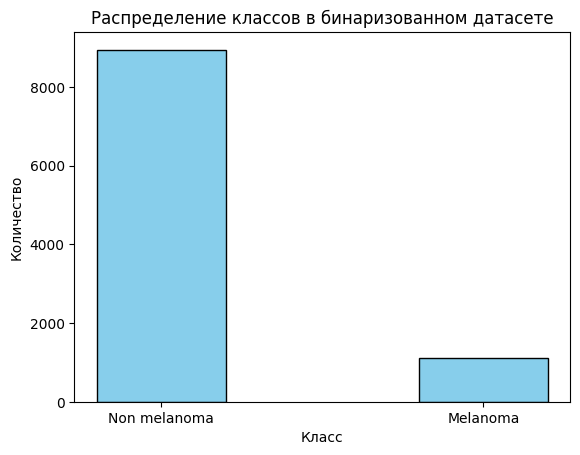

In [ ]:
targets_bin_int = [int(val) for val in targets_bin]

# Подсчет частот
unique_values, counts = zip(*sorted(Counter(targets_bin_int).items()))

# Установка ширины столбцов и расстояния между ними
bar_width = 0.4  # Задайте желаемую ширину столбцов
plt.bar(unique_values, counts, width=bar_width, color='skyblue', edgecolor='black')

# Настройка подписей к столбцам
plt.xticks(unique_values, ['Non melanoma', 'Melanoma'])

# Настройка графика
plt.title('Распределение классов в бинаризованном датасете')
plt.xlabel('Класс')
plt.ylabel('Количество')

# Отображение графика
plt.show()

In [ ]:
unique_values, counts

((0, 1), (8941, 1113))

In [ ]:
imgs.shape

torch.Size([10054, 64, 64, 3])

In [ ]:
imgs = imgs.permute(0, 3, 1, 2)

In [ ]:
targets_bin = targets_bin.int()

In [ ]:
targets_bin

tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.int32)

In [ ]:
from torch.utils.data import TensorDataset, DataLoader
dataset = TensorDataset(imgs, targets_bin)

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split

# Количество данных для каждого набора
total_size = len(imgs)
train_size = int(0.6 * total_size)
val_size = int(0.2 * total_size)
test_size = total_size - train_size - val_size

# Инициализация StratifiedShuffleSplit
stratified_splitter = StratifiedShuffleSplit(n_splits=1, test_size=val_size + test_size, random_state=42)

# Использование StratifiedShuffleSplit для создания индексов
indices = list(stratified_splitter.split(imgs, targets_bin))[0]

# Разделение данных на обучающий, валидационный и тестовый наборы
train_indices, val_test_indices = indices
val_indices, test_indices = train_test_split(val_test_indices, test_size=test_size, stratify=targets_bin[val_test_indices])

# Создание PyTorch Dataset с учетом стратификации
train_dataset = TensorDataset(imgs[train_indices], targets_bin[train_indices])
val_dataset = TensorDataset(imgs[val_indices], targets_bin[val_indices])
test_dataset = TensorDataset(imgs[test_indices], targets_bin[test_indices])


In [ ]:
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import StratifiedShuffleSplit,
# train_test_split
# from sklearn.metrics import classification_report
# from torch.utils.data import random_split



# train_size = int(0.6 * len(dataset))
# val_size = int(0.2 * len(dataset))
# test_size = len(dataset) - train_size - val_size

# train_dataset, val_dataset, test_dataset = random_split(dataset, [train_size, val_size, test_size])


In [ ]:
import torchvision.transforms as transforms
input_size = 64
images = train_dataset.tensors[0]  # Получаем тензор изображений из TensorDataset

images.shape
mean = torch.mean(images, dim=(0, 2, 3))
std = torch.std(images, dim=(0, 2, 3))

train_transform = transforms.Compose([transforms.Resize((input_size,input_size)),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.RandomVerticalFlip(),
                                     transforms.RandomRotation(20)])
val_transform = transforms.Compose([transforms.Resize((input_size,input_size))])

In [ ]:
# import torch
# from torch.utils.data import Dataset, TensorDataset, random_split
# from torchvision import transforms

# class DatasetFromSubset(Dataset):
#     def __init__(self, subset, transform=None):
#         self.subset = subset
#         self.transform = transform

#     def __getitem__(self, index):
#         x, y = self.subset[index]
#         if self.transform:
#             x = self.transform(x)
#         return x, y

#     def __len__(self):
#         return len(self.subset)

In [ ]:



# tr_set = DatasetFromSubset(train_dataset, train_transform)

In [ ]:
# vl_set = DatasetFromSubset(val_dataset, val_transform)
# ts_set = DatasetFromSubset(test_dataset, val_transform)

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

Using device: cuda


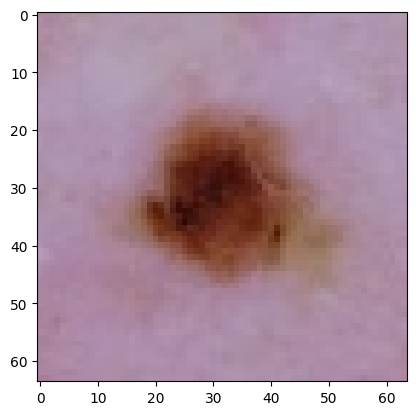

In [ ]:
import matplotlib.pyplot as plt
from torchvision import transforms

# Предполагается, что dataset - это объект TensorDataset с imgs и targets_bin

# Создаем DataLoader для датасета
data_loader = DataLoader(dataset, batch_size=16, shuffle=True)

# Получаем один батч данных
batch = next(iter(train_loader))
imgs, targets_bin = batch
img = transforms.ToPILImage()(imgs[1]/255.0)
plt.imshow(img)

In [ ]:
imgs[1]

tensor([[[171., 170., 171.,  ..., 176., 177., 175.],
         [175., 169., 168.,  ..., 176., 176., 174.],
         [173., 171., 170.,  ..., 175., 174., 172.],
         ...,
         [170., 172., 173.,  ..., 172., 171., 170.],
         [172., 172., 173.,  ..., 175., 174., 173.],
         [166., 166., 168.,  ..., 174., 174., 171.]],

        [[137., 136., 138.,  ..., 151., 154., 152.],
         [141., 135., 135.,  ..., 151., 153., 151.],
         [140., 138., 137.,  ..., 150., 151., 149.],
         ...,
         [131., 133., 134.,  ..., 138., 135., 135.],
         [132., 133., 134.,  ..., 139., 138., 137.],
         [126., 126., 129.,  ..., 138., 138., 135.]],

        [[161., 160., 159.,  ..., 172., 174., 170.],
         [165., 159., 156.,  ..., 173., 173., 169.],
         [161., 159., 158.,  ..., 172., 171., 169.],
         ...,
         [158., 160., 161.,  ..., 163., 161., 159.],
         [159., 160., 161.,  ..., 165., 164., 163.],
         [153., 153., 156.,  ..., 166., 164., 161.]]]

In [ ]:
def set_para_req_grad(model, grad):
    if grad == True:
        for param in model.parameters():
            param.requires_grad = False

def initialise_model(model_name, num_classes, grad, use_pretrained=True):
    '''
    grad = if the pretrained weights be updated
    use_pretrained = use pre trained weights or start from scratch
    '''
    model = None

    if model_name == 'resnet':
        model = models.resnet50(pretrained=use_pretrained)
        set_para_req_grad(model, grad)
        num_ftrs = model.fc.in_features
        model.fc = nn.Linear(num_ftrs, num_classes)
    elif model_name == 'densenet':
        model = models.densenet121(pretrained=use_pretrained)
        set_para_req_grad(model,grad)
        num_ftrs = model.classifier.in_features
        model.classifier = nn.Linear(num_ftrs, num_classes)
    return model

In [ ]:
from torchvision import models, transforms
import torch.nn as nn


In [ ]:
num_classes = 2
model_name = 'densenet'
grad = True
#initialise model to run
model = initialise_model(model_name, num_classes, grad, use_pretrained=True)

In [ ]:
model.features.conv0 = nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(3, 3), bias=False)

In [ ]:
device

device(type='cuda')

In [ ]:
batch_size = 32
# epochs = 10
lr = 1e-2

from sklearn.metrics import fbeta_score
class_weights = [1.0, 9.0]  # Веса для классов (миноритарный класс имеет вес 10)
criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights)).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
sheduler = torch.optim.lr_scheduler.StepLR(optimizer,3,0.1)

In [ ]:
from tqdm import tqdm
from sklearn.metrics import balanced_accuracy_score

@torch.inference_mode()
def get_correct_count(pred, labels):
  _, predicted = torch.max(pred.data, 1)
  return (predicted == labels).sum().item()

@torch.inference_mode()
def calculate_accuracy(model, data_loader, criterion, device):
    correct, total = 0, 0
    loss = 0
    all_labels = []
    all_predictions = []
    for batch in data_loader:
        imgs, labels = batch
        pred = model(imgs.to(device))
        labels = labels.long()
        loss += criterion(pred, labels.to(device))
        correct += get_correct_count(pred, labels.to(device))
        total += labels.size(0)
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(pred.cpu().detach().numpy())
    all_predictions_1 = []
    for i in all_predictions:
        k = i.argmax()
        all_predictions_1.append(k)

    return correct / total , loss.item() / len(data_loader), balanced_accuracy_score(all_labels, all_predictions_1)

In [ ]:
model = model.to(device)

In [ ]:
from IPython.display import clear_output
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

class ProgressPlotter:
  def __init__(self,title = None) -> None:
    self._history_dict = defaultdict(list)
    self.title = title

  def add_scalar(self, tag: str, value)-> None:
    self._history_dict[tag].append(value)

  def display_keys(self,ax,tags):
    if isinstance(tags, str):
      tags = [tags]
    history_len = 0
    ax.grid()
    for key in tags:
      ax.plot(self._history_dict[key], marker="X",label=key)
      history_len = max(history_len,len(self.history_dict[key]))
    if len(tags) > 1:
      ax.legend(loc="lower left")
    else:
      ax.set_ylabel(key)
    ax.set_xlabel('step')
    ax.set_xticks(np.arange(history_len))
    ax.set_xticklabels(np.arange(history_len))

  """
     groups list of keys like [['loss_train','loss_val'],['accuracy']]
     All charts within a group will be plot in the same axis
  """
  def display(self,groups = None):
    clear_output()
    if groups is None:
      groups = self._history_dict.keys()
    n_groups = len(groups)
    fig, ax = plt.subplots(n_groups, 1, figsize=(12, 3*n_groups))
    fig.suptitle(self.title)
    if n_groups == 1:
      ax = [ax]
    for i, keys in enumerate(groups):
      self.display_keys(ax[i],keys)
    fig.tight_layout()
    plt.show()

  @property
  def history_dict(self):
    return dict(self._history_dict)

In [ ]:
from sklearn.metrics import balanced_accuracy_score

def train(model, train_loader, val_loader, criterion, optimizer, scheduler, device, num_epochs=50, tag="MNIST"):
    pp = ProgressPlotter()

    accss = []
    for epoch in tqdm(range(num_epochs)):
        correct, total, ep_loss, bal = 0, 0, 0, 0
        num = 0
        all_labels = []
        all_predictions = []
        for imgs, labels in train_loader:

            # Compute predictions of the model
            outputs = model(imgs.to(device)) # Your code here

            # Compute loss between predictions and labels
            labels = labels.long()
            loss = criterion(outputs.to(device), labels.to(device))# Your code here

            correct += get_correct_count(outputs.detach().cpu(), labels.detach().cpu())

            # Nullify gradients, make a backward and do an optimization step
            # Your code here
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(outputs.cpu().detach().numpy())
            # End of your code

            total += labels.size(0)
            ep_loss += loss.item()

        # scheduler.step()

        # Logging
        pp.add_scalar('loss_train', ep_loss / len(train_loader))
        all_predictions_1 = []
        for i in all_predictions:
          k = i.argmax()
          all_predictions_1.append(k)

        pp.add_scalar('balanced_accuracy_train', balanced_accuracy_score(all_labels, all_predictions_1))

        accuracy, loss_val, bal = calculate_accuracy(model, val_loader, criterion, device)
        pp.add_scalar('loss_val',loss_val)
        pp.add_scalar('balanced_accuracy_val',bal)
        scheduler.step(ep_loss / len(train_loader))

        pp.display([['loss_train','loss_val'],['balanced_accuracy_train','balanced_accuracy_val']])
        accss.append(accuracy)
        # print(accuracy, loss_val)
    return pp

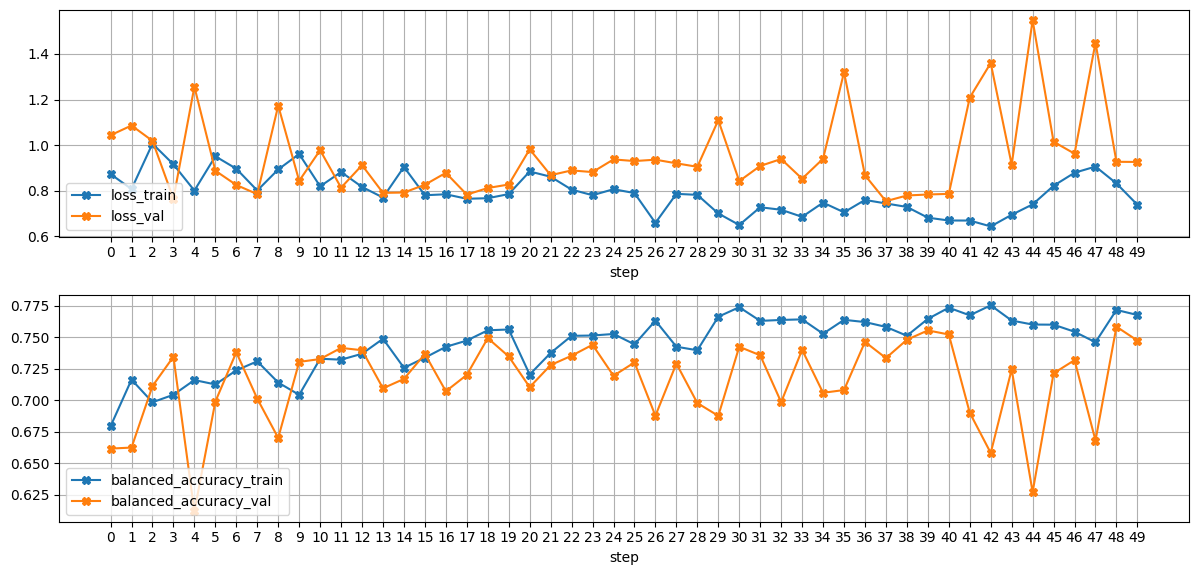

100%|██████████| 50/50 [07:16<00:00,  8.74s/it]


In [ ]:
train(model, train_loader, val_loader, criterion, optimizer, sheduler, device)

In [ ]:
from sklearn.metrics import fbeta_score

def validate(model, test_loader, beta=2, device = "cpu"):
    f1_bet = []
    for imgs, labels in test_loader:
        pred = model.to(device)(imgs.to(device))
        print(pred)
        f1_beta = fbeta_score(labels.detach().numpy(), pred.detach().numpy(), beta=beta)
        f1_bet.append(f1_beta)
    return f1_bet

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import fbeta_score
from sklearn.metrics import balanced_accuracy_score

def evaluate_model(model, test_loader):
    model.to(device)
    model.eval()

    y_true = []
    y_pred = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    bal = balanced_accuracy_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    f1_beta = fbeta_score(y_true, y_pred, beta=2)

    print(classification_report(y_true, y_pred))

    print('f1_beta: ', f1_beta)

    cm = confusion_matrix(y_true, y_pred)
    display_labels = list(range(cm.shape[0]))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
    disp.plot()

    return [bal, accuracy, precision, recall, f1]

              precision    recall  f1-score   support

           0       0.97      0.66      0.78      1789
           1       0.24      0.86      0.37       223

    accuracy                           0.68      2012
   macro avg       0.60      0.76      0.58      2012
weighted avg       0.89      0.68      0.74      2012

f1_beta:  0.5617647058823528


[0.7558084156542098,
 0.6774353876739563,
 0.6049040327620803,
 0.7558084156542098,
 0.5768373861674655]

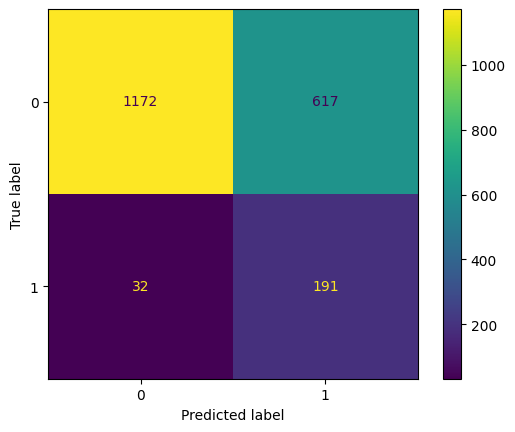

In [ ]:
evaluate_model(model, test_loader)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, gamma=2, alpha=None, size_average=True):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.alpha = alpha
        if isinstance(alpha, (float, int)): self.alpha = torch.Tensor([alpha, 1 - alpha])
        if isinstance(alpha, list): self.alpha = torch.Tensor(alpha)
        self.size_average = size_average

    def forward(self, input, target):
        if input.dim() > 2:
            input = input.view(input.size(0), input.size(1), -1)  # N,C,H,W => N,C,H*W
            input = input.transpose(1, 2)  # N,C,H*W => N,H*W,C
            input = input.contiguous().view(-1, input.size(2))  # N,H*W,C => N*H*W,C
        target = target.view(-1, 1)

        logpt = F.log_softmax(input, dim=1)
        logpt = logpt.gather(1, target)
        logpt = logpt.view(-1)
        pt = logpt.exp()

        if self.alpha is not None:
            if self.alpha.type() != input.data.type():
                self.alpha = self.alpha.type_as(input.data)
            at = self.alpha.gather(0, target.data.view(-1))
            logpt = logpt * at

        loss = -1 * (1 - pt) ** self.gamma * logpt
        if self.size_average:
            return loss.mean()
        else:
            return loss.sum()

In [ ]:
num_classes = 2
model_name = 'resnet'
# grad = True
#initialise model to run
model_res = initialise_model(model_name, num_classes, grad, use_pretrained=True)

# batch_size = 32
# epochs = 10
# lr = 1e-3

# from sklearn.metrics import fbeta_score
# class_weights = [1.0, 10.0]  # Веса для классов (миноритарный класс имеет вес 10)
# # criterion = nn.CrossEntropyLoss(weight=torch.tensor(class_weights)).to(device)
# criterion = FocalLoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=lr)
# sheduler = torch.optim.lr_scheduler.StepLR(optimizer,5,0.1)

model_res = model_res.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 66.6MB/s]


In [ ]:
model_res.conv1 = nn.Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(3, 3), bias=False)
model_res = model_res.to(device)


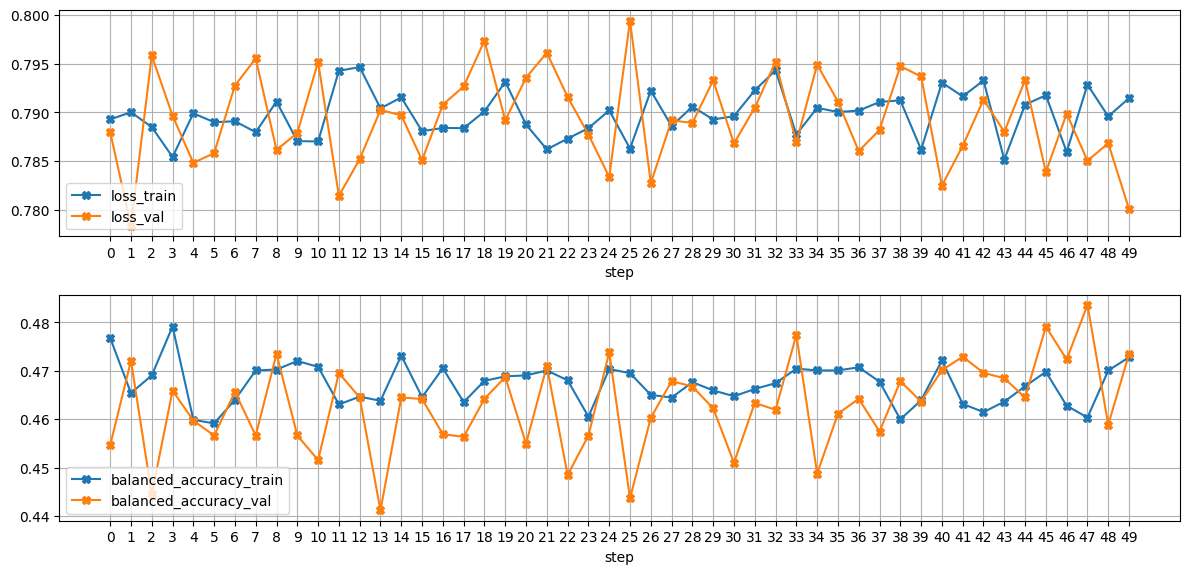

100%|██████████| 50/50 [07:09<00:00,  8.58s/it]


In [ ]:
train(model_res, train_loader, val_loader, criterion, optimizer, sheduler, device)

              precision    recall  f1-score   support

           0       0.81      0.10      0.18      1789
           1       0.10      0.81      0.18       223

    accuracy                           0.18      2012
   macro avg       0.46      0.46      0.18      2012
weighted avg       0.73      0.18      0.18      2012

f1_beta:  0.3364485981308411


[0.45557179274439963,
 0.18190854870775347,
 0.4565902617393285,
 0.45557179274439963,
 0.18190127338499862]

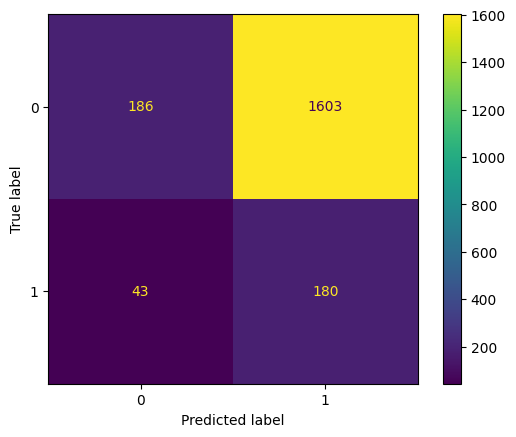

In [ ]:
evaluate_model(model_res, test_loader)

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 11.7 MB/s eta 0:00:00


In [ ]:
import timm
model_xcept = timm.create_model('xception', pretrained=True, num_classes=2)

Downloading: "https://github.com/rwightman/pytorch-image-models/releases/download/v0.1-cadene/xception-43020ad28.pth" to /root/.cache/torch/hub/checkpoints/xception-43020ad28.pth


In [ ]:
model_xcept.to(device)

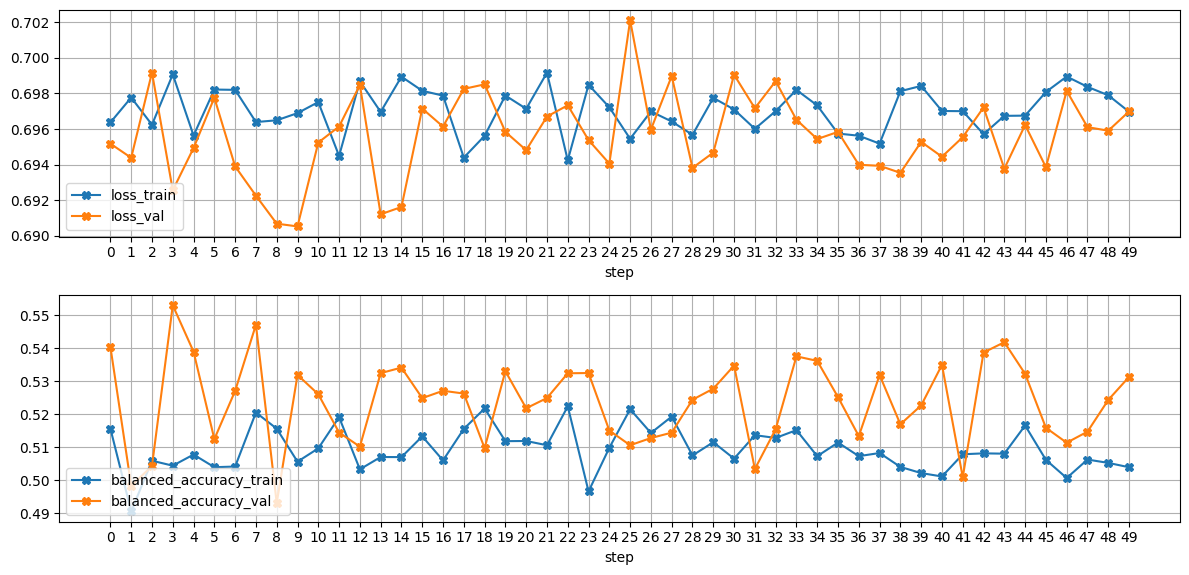

100%|██████████| 50/50 [08:34<00:00, 10.29s/it]


In [ ]:
train(model_xcept, train_loader, val_loader, criterion, optimizer, sheduler, device)

              precision    recall  f1-score   support

           0       0.89      0.75      0.82      1789
           1       0.13      0.29      0.18       223

    accuracy                           0.70      2012
   macro avg       0.51      0.52      0.50      2012
weighted avg       0.81      0.70      0.75      2012

f1_beta:  0.22922636103151864


[0.520524029507679,
 0.702286282306163,
 0.5107732306008168,
 0.520524029507679,
 0.4971928546605037]

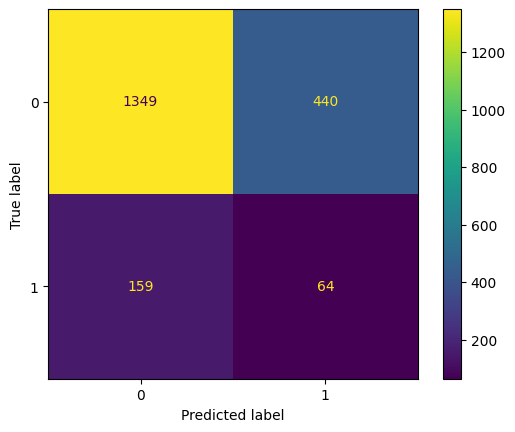

In [ ]:
evaluate_model(model_xcept, test_loader)


In [ ]:
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace=True)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace=True)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace=True)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu

In [ ]:
type(imgs[1])

torch.Tensor

In [ ]:
model.eval()

In [ ]:
from torchsummary import summary
arch = summary(model_res.to('cpu'), (3, 64, 64), device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 34, 34]           1,728
       BatchNorm2d-2           [-1, 64, 34, 34]             128
              ReLU-3           [-1, 64, 34, 34]               0
         MaxPool2d-4           [-1, 64, 17, 17]               0
            Conv2d-5           [-1, 64, 17, 17]           4,096
       BatchNorm2d-6           [-1, 64, 17, 17]             128
              ReLU-7           [-1, 64, 17, 17]               0
            Conv2d-8           [-1, 64, 17, 17]          36,864
       BatchNorm2d-9           [-1, 64, 17, 17]             128
             ReLU-10           [-1, 64, 17, 17]               0
           Conv2d-11          [-1, 256, 17, 17]          16,384
      BatchNorm2d-12          [-1, 256, 17, 17]             512
           Conv2d-13          [-1, 256, 17, 17]          16,384
      BatchNorm2d-14          [-1, 256,

In [ ]:
model_res._modules

OrderedDict([('conv1',
              Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(3, 3), bias=False)),
             ('bn1',
              BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)),
             ('relu', ReLU(inplace=True)),
             ('maxpool',
              MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)),
             ('layer1',
              Sequential(
                (0): Bottleneck(
                  (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
                  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
                  (bn3): BatchN

In [ ]:
from IPython.display import clear_output

!pip install grad-cam
clear_output()

In [ ]:

from pytorch_grad_cam import GradCAM

target_layers = [model_res._modules["layer4"]]

cam = GradCAM(model=model, target_layers=target_layers)

In [ ]:
def get_input_transform():
    transform = transforms.Compose([
        transforms.Resize(64),
        transforms.ToTensor(),
    ])
    return transform

def get_input_tensors(img):
    transform = get_input_transform()
    # unsqeeze converts single image to batch of 1
    return transform(img).unsqueeze(0)

img_t = imgs[57]
img_t.to('cpu')

tensor([[[192., 180., 189.,  ..., 207., 207., 205.],
         [199., 192., 197.,  ..., 206., 208., 208.],
         [203., 201., 204.,  ..., 207., 210., 211.],
         ...,
         [195., 195., 195.,  ..., 212., 211., 212.],
         [196., 196., 196.,  ..., 211., 209., 209.],
         [191., 191., 191.,  ..., 207., 205., 205.]],

        [[147., 135., 142.,  ..., 159., 160., 158.],
         [154., 147., 150.,  ..., 159., 161., 161.],
         [156., 154., 157.,  ..., 160., 163., 165.],
         ...,
         [149., 147., 145.,  ..., 174., 173., 174.],
         [150., 148., 144.,  ..., 173., 171., 171.],
         [145., 144., 139.,  ..., 169., 167., 167.]],

        [[128., 116., 126.,  ..., 139., 144., 142.],
         [135., 128., 134.,  ..., 141., 145., 145.],
         [138., 136., 141.,  ..., 142., 147., 149.],
         ...,
         [126., 124., 120.,  ..., 155., 154., 155.],
         [126., 125., 120.,  ..., 154., 152., 152.],
         [121., 118., 115.,  ..., 150., 148., 148.]]]

In [ ]:
img_t.unsqueeze(0).shape

torch.Size([1, 3, 64, 64])

In [ ]:
model_res.eval()

In [ ]:
outp = model_res(img_t.unsqueeze(0))

In [ ]:
outp

tensor([[-0.1102,  0.6733]], grad_fn=<AddmmBackward0>)

TypeError: ignored

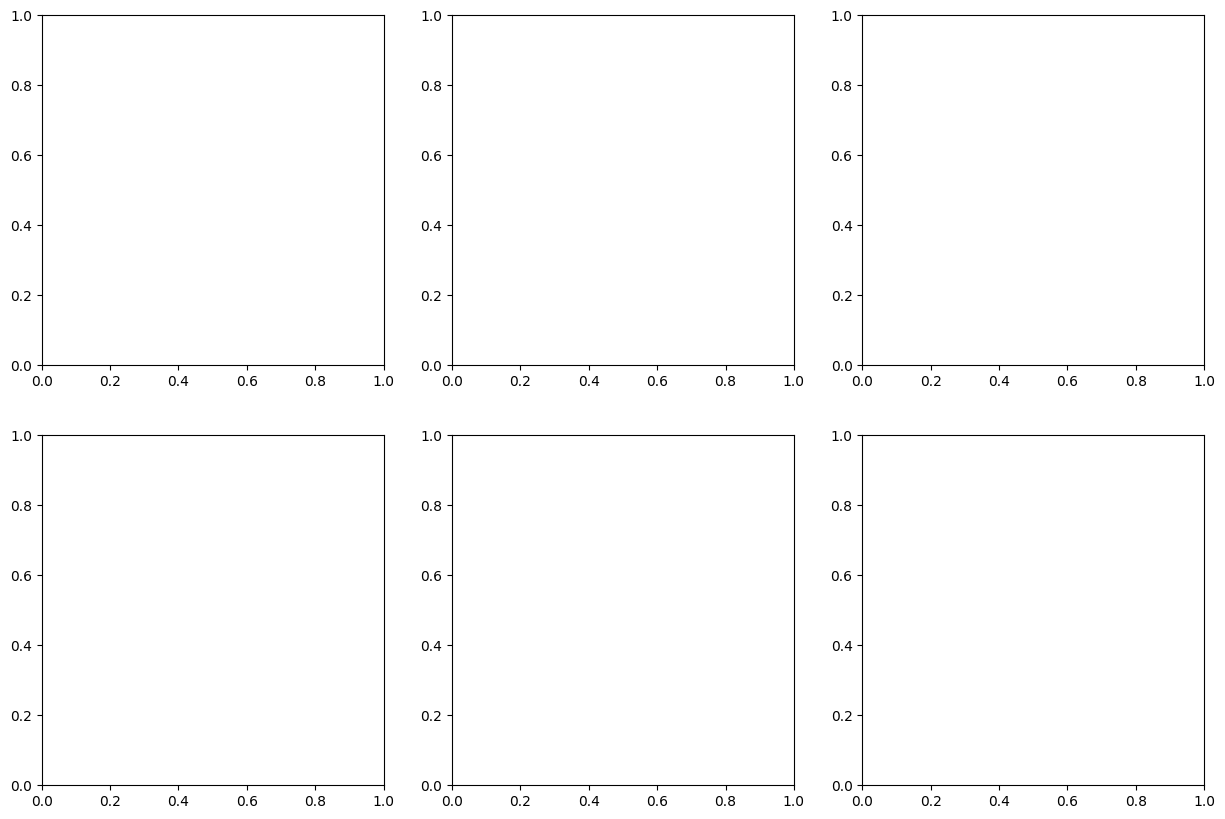

In [ ]:

from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget

fif, axs = plt.subplots(2, 3, figsize=(15, 10))

axs = axs.ravel()
for i in range(1):
    target = [ClassifierOutputTarget([[0, 1]])]
    cam_map = cam(input_tensor=img_t.unsqueeze(0).to(device), targets=target)

    axs[i].imshow(img_arr)
    axs[i].imshow(cam_map[0], alpha=0.6, interpolation="bilinear", cmap="jet")
    axs[i].set_title(idx2label[top_inds[0][i].item()])
    axs[i].axis("off");